In [73]:
import kagglehub
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import kaggle

In [37]:
from scipy.stats import chi2_contingency

In [6]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [8]:
df.head(5)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [20]:
# Generating a crosstab result

crosstab_result = pd.crosstab(df["category"], df["isBestSeller"])
crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [22]:
crosstab_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 3D Printers to eBook Readers & Accessories
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   False   296 non-null    int64
 1   True    296 non-null    int64
dtypes: int64(2)
memory usage: 6.9+ KB


In [29]:
# In Strings umwandeln
crosstab_result.columns =crosstab_result.columns.astype(str) 

In [31]:
crosstab_result["bestseller_proportion"] = crosstab_result["True"]/(crosstab_result["False"] + crosstab_result["True"])

In [36]:
crosstab_result.sort_values(by ="bestseller_proportion" ,ascending=False).head(20)

isBestSeller,False,True,bestseller_proportion
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
"Billiard, Snooker & Pool",241,8,0.032129
Pet Supplies,9152,285,0.030200
Home Brewing & Wine Making,239,7,0.028455
Wind Instruments,243,7,0.028000


In [56]:
old_crosstab_result = crosstab_result.drop(columns= "bestseller_proportion")

In [57]:
crosstab_result

isBestSeller,False,True,bestseller_proportion
category,,,
3D Printers,247,1,0.004032
3D Printing & Scanning,4065,2,0.000492
Abrasive & Finishing Products,245,5,0.020000
Action Cameras,1696,1,0.000589
Adapters,251,3,0.011811
...,...,...,...
Wind Instruments,243,7,0.028000
Window Treatments,234,5,0.020921
Women,17559,213,0.011985


In [58]:
chi_value, chi_p,_,_ = chi2_contingency(crosstab_result)
chi_value, chi_p

(36684.23786636857, 0.0)

In [59]:
# Conduct a Cramers V 
from scipy.stats.contingency import association

In [60]:
# Cramer V
association(crosstab_result.drop(columns= "bestseller_proportion"), method="cramer")

0.1222829439760564

<Axes: xlabel='category'>

<Figure size 50000x50000 with 0 Axes>

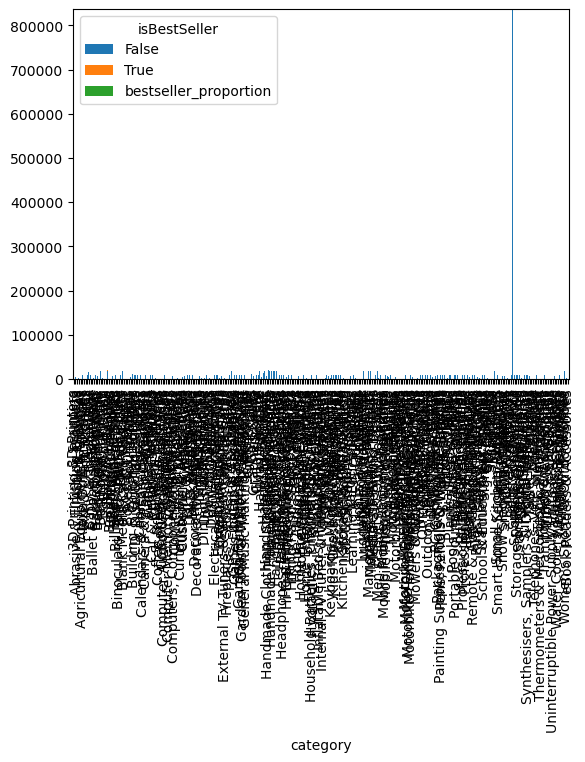

In [80]:
# Plotting a stacked bar chart for the 'crosstab_result' data
plt.figure(figsize=(500,500))
crosstab_result.plot(kind="bar", stacked=True)


CHALLENGE 2

In [81]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers#

In [82]:
outliers = tukeys_test_outliers(df["price"])
outliers


10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64

In [ ]:
# Use .loc with a lambda function to filter out the outliers without using the operator
df_cleaned = df.loc[df["price"].apply(lambda x: x not in outliers.values)].reset_index(drop=True)

In [87]:
df_cleaned = df.loc[~df["price"].isin(outliers)].reset_index(drop=True) 

In [88]:
df_cleaned

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2115958,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2115959,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2115960,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2115961,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [103]:
df_cleaned[["price","category"]].groupby("category").count().sort_values(by = "price",ascending=False).head(20)

,price
category,
Sports & Outdoors,694092
Beauty,19233
Bath & Body,19050
Manicure & Pedicure Products,18904
"Handmade Clothing, Shoes & Accessories",18811
Make-up,18718
Skin Care,18686
Hair Care,18625
Birthday Gifts,18398
